# Algoritmos supervisados: un proyecto sobre predicción temporal

En esta sesión seguimos profundizando en técnicas de *Machine Learning* aplicadas a **predicción** mediante varios proyectos. Como habéis podido comprobar con en el notebook anterior, la aplicación de modelos no conlleva un trabajo excesivo, lo importante es la coherencia del proceso con el objetivo pretendido. Por tanto, lo complejo es determinar el modelo.

En muchos problemas de predicción aparece el **tiempo**. Por ello, en este proyecto trabajaremos con datos de cotización de varias compañías para predecir **valores de cierre futuros**. Nuestro objetivo será cómo utilizar el **tiempo** dentro del modelo. 

Para series temporales, los modelos realmente específicos (porque modelan explícitamente la dependencia temporal) son, por ejemplo:
- Modelos autoregresivos y de medias móviles: AR, MA, ARMA.
- ARIMA y su extensión estacional SARIMA.
- Modelos de suavizado exponencial (Holt, Holt‑Winters).
- Redes neuronales con memoria temporal: RNN, LSTM, GRU.
- Arquitecturas secuencia‑a‑secuencia y modelos con atención aplicados a series.

En ML, modelos como regresión lineal, SVM, árboles, Random Forest, etc., no son específicos: solo sirven para series si "gestionamos" el tiempo en features (lags, ventanas, etc.).

¿Entonces vamos a perder el tiempo? NO! Gracias a este proyecto veremos las limitaciones de los modelos de ML en la gestión temporal y también replantearemos el tiempo para que pueda ser consumido por el modelo como cualquier otra característica.

A nivel general, en problemas de predicción (clasificación o regresión) existen múltiples algoritmos como:
- Linear regressión / Regresión Lineal: https://es.wikipedia.org/wiki/Regresi%C3%B3n_lineal 
- Regresión logística (para predicción de clases) : https://es.wikipedia.org/wiki/Regresi%C3%B3n_log%C3%ADstica
- Máquinas de vectores de soporte / SVM: https://es.wikipedia.org/wiki/M%C3%A1quinas_de_vectores_de_soporte
- CART / Classification And Regression Trees https://www.nature.com/articles/nmeth.4370
- Gradient Boosting / Potenciación del gradiente: https://es.wikipedia.org/wiki/Gradient_boosting
- Random Forest / Bosques aleatorios: https://es.wikipedia.org/wiki/Random_forest
- Artificial Neural Networks / Redes neuronales artificiales:  https://en.wikipedia.org/wiki/Artificial_neural_network
- k-vecinos más próximos  / K-nearest neighbors (k-NN): https://es.wikipedia.org/wiki/K_vecinos_m%C3%A1s_pr%C3%B3ximos
- Análisis discriminante lineal (LDA): https://es.wikipedia.org/wiki/An%C3%A1lisis_discriminante_lineal
- etc.


La gran mayoría están implementados en la librería de python [scikit-learn/supervised_learning](https://scikit-learn.org/stable/supervised_learning.html)

<img src="images/ModelSelection_ref_book_5.png" width=80%/>

> Fuente de la imagen: [5] Machine Learning & Data Science Blueprints for Finance



### Preparemos los datos

En este caso, usaremos los datos obtenidos en [yahoo finance](https://es.finance.yahoo.com/?guccounter=1) sobre la compañia de *Google*. Los datos se encuentran en: ```data/GOOGL.csv'''



In [2]:
import pandas as pd
data = pd.read_csv("data/GOOGL.csv")
data.index = pd.DatetimeIndex(data["Date"])
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2017-01-03,2017-01-03,40.030998,40.571999,39.844501,40.400501,40.400501,39180000
2017-01-04,2017-01-04,40.494499,40.671501,40.205502,40.388500,40.388500,30306000
2017-01-05,2017-01-05,40.375000,40.687000,40.296001,40.651001,40.651001,26810000
2017-01-06,2017-01-06,40.749500,41.448002,40.575001,41.260502,41.260502,40342000
2017-01-09,2017-01-09,41.318501,41.521500,41.081001,41.359001,41.359001,28178000


In [4]:
print(data.index.min())
print(data.index.max())

2017-01-03 00:00:00
2020-12-30 00:00:00


In [6]:
print(data.columns) 

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [7]:
# Nuestra variable objetivo será el valor de cierre de la compañia.
data["Close"][:10] 

Date
2017-01-03    40.400501
2017-01-04    40.388500
2017-01-05    40.651001
2017-01-06    41.260502
2017-01-09    41.359001
2017-01-10    41.300499
2017-01-11    41.493000
2017-01-12    41.476501
2017-01-13    41.547001
2017-01-17    41.373001
Name: Close, dtype: float64

### Análisis de una serie temporal

Antes de construir un modelo de predicción conviene entender la serie temporal: ver si presenta tendencia, patrones estacionales o mucho ruido.

Una herramienta clásica es la descomposición de la serie temporal, que separa la serie observada en varios componentes. En el caso aditivo se escribe como:
$Y[t] = T[t] + S[t] + I[t]$ 

- T_{t}, componente de tendencia, que recoge la evolución a largo plazo (creciente, decreciente, etc.).
- S_{t}, componente estacional, que recoge patrones que se repiten con un periodo fijo (por ejemplo, días de la semana, meses, trimestres) [1]
- I_t, componente irregular o ruido, que recoge las variaciones aleatorias no explicadas por los otros componentes.


In [9]:
!uv add statsmodels

Resolved 99 packages in 10ms
Audited 94 packages in 0.34ms


In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data['Close'], model="additive", period=30)
trend = result.trend
seasonal = result.seasonal
resid = result.resid


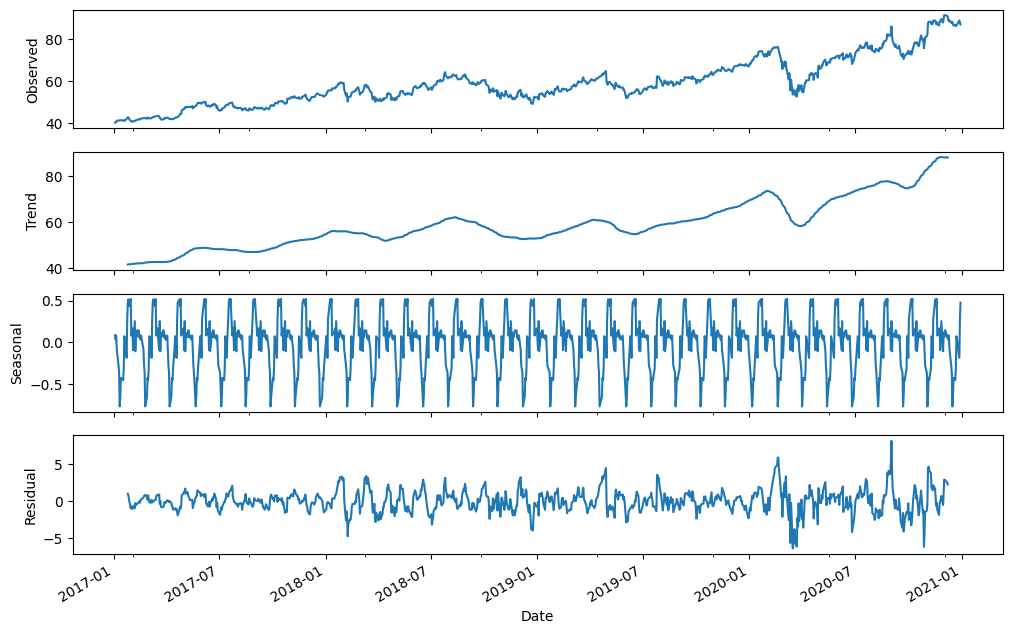

In [11]:
# Paso 1
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(12,8))
result.observed.plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Observed')
trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel('Trend')
seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Seasonal')
resid.plot(ax=axes[3], legend=False)
axes[3].set_ylabel('Residual')
plt.show()

### Predicción con ARIMA

>En estadística y econometría, en particular en series temporales, un modelo autorregresivo integrado de promedio móvil o ARIMA (acrónimo del inglés autoregressive integrated moving average) es un modelo estadístico que utiliza variaciones y regresiones de datos estadísticos con el fin de encontrar patrones para una predicción hacia el futuro. Se trata de un modelo dinámico de series temporales, es decir, las estimaciones futuras vienen explicadas por los datos del pasado y no por variables independientes. Fue desarrollado a finales de los sesenta del siglo XX. Box y Jenkins (1976) lo sistematizaron.


Fuente [Wikipedia](https://es.wikipedia.org/wiki/Modelo_autorregresivo_integrado_de_media_m%C3%B3vil)

- https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima.model.ARIMA.html
  

In [ ]:
# Podemos trabajar con diferentes periodos para la predicción!!!
import pandas as pd

data = pd.read_csv("data/GOOGL.csv", parse_dates=["Date"], index_col="Date") ##VAMOS A HACERLO BIEN YA!
# ¿Probamos meses? 
print(data.index[:45])
# tenemos muchas muestras de cada més: 30,31,28,29, etc.
# ¿Que deberíamos de hacer?¿Qué muestra mensual puede ser la mejor?

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
               '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
               '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
               '2017-02-01', '2017-02-02', '2017-02-03', '2017-02-06',
               '2017-02-07', '2017-02-08', '2017-02-09', '2017-02-10',
               '2017-02-13', '2017-02-14', '2017-02-15', '2017-02-16',
               '2017-02-17', '2017-02-21', '2017-02-22', '2017-02-23',
               '2017-02-24', '2017-02-27', '2017-02-28', '2017-03-01',
               '2017-03-02', '2017-03-03', '2017-03-06', '2017-03-07',
               '2017-03-08'],
              dtype='datetime64[ns]', name='Date', freq=None)


In [28]:
# RESAMPLE ! Vamos a coger la última muestra de cada mes:
close_monthly = data["Close"].resample('ME').last()
print(close_monthly[:14])
print(len(close_monthly))

Date
2017-01-31    41.009499
2017-02-28    42.246498
2017-03-31    42.389999
2017-04-30    46.226002
2017-05-31    49.354500
2017-06-30    46.484001
2017-07-31    47.275002
2017-08-31    47.762001
2017-09-30    48.686001
2017-10-31    51.652000
2017-11-30    51.808498
2017-12-31    52.669998
2018-01-31    59.111000
2018-02-28    55.195999
Freq: ME, Name: Close, dtype: float64
48


In [33]:
# Paso 2.a  Cargamos/Fit/Entrenamos ARIMA 
from statsmodels.tsa.arima.model import ARIMA 

order= (3, 1, 0) # order = p,d,q !!OJO!!
model = ARIMA(close_monthly, order=order)

model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   48
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -130.621
Date:                Tue, 09 Dec 2025   AIC                            269.241
Time:                        10:57:51   BIC                            276.642
Sample:                    01-31-2017   HQIC                           272.026
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0901      0.128     -0.704      0.481      -0.341       0.161
ar.L2         -0.2209      0.137     -1.609      0.108      -0.490       0.048
ar.L3          0.1170      0.165      0.709      0.4

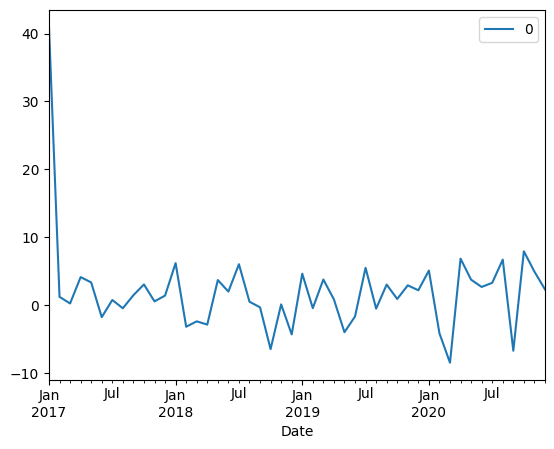

               0
count  48.000000
mean    2.001236
std     6.843555
min    -8.461429
25%    -0.455059
50%     1.450549
75%     3.769838
max    41.009499


In [34]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
print(residuals.describe()) # más o menos valores cercanos al 0 ok

El cálculo del **orden en ARIMA** ha de hacerse seguiendo un proceso más metodológico:

- Elegir d (diferencias)
  - Comprobar estacionariedad (gráfica, test ADF, KPSS, etc.).
  - Aplicar las diferencias mínimas necesarias.
- Elegir p y qq
  -  Mirar ACF y PACF de la serie ya diferenciada:
     -  PACF que “corta” en el rezago 3 sugiere p≈3.
     -  ACF que “corta” en cierto rezago sugiere el q.
  - Probar varios modelos cercanos y comparar AIC/BIC: quedarse con el que tenga menor AIC/BIC y residuos ''limpios''.

NOTA: Esto queda fuera del alcance de esta asignatura!!

In [36]:
# Retomamos el modelo entrenado con ARIMA para predecir futuros valores
forecast = model_fit.forecast(steps=12)
print(forecast)

2021-01-31    86.247888
2021-02-28    87.308516
2021-03-31    87.231475
2021-04-30    86.938066
2021-05-31    87.105654
2021-06-30    87.146347
2021-07-31    87.071324
2021-08-31    87.088709
2021-09-30    87.108477
2021-10-31    87.094075
2021-11-30    87.093041
2021-12-31    87.098629
Freq: ME, Name: predicted_mean, dtype: float64


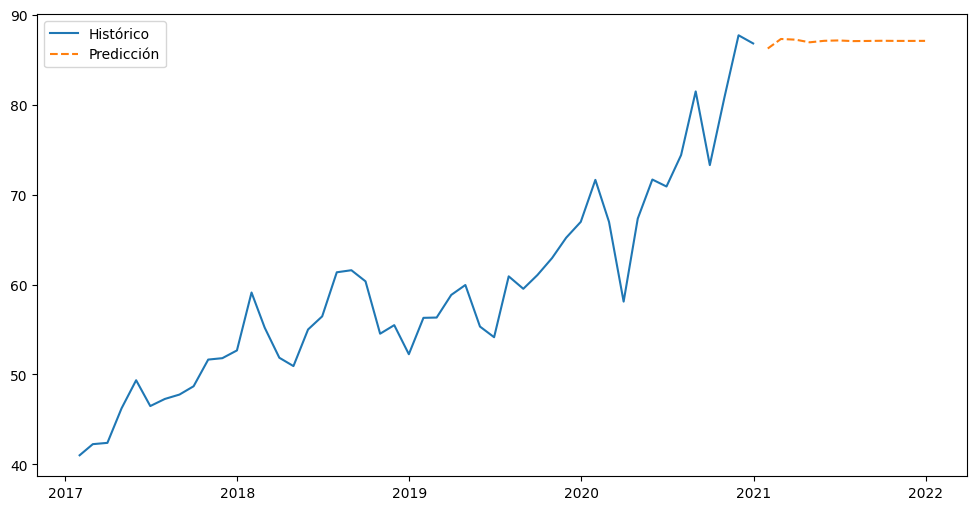

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(close_monthly, label="Histórico")
plt.plot(forecast, label="Predicción", linestyle="--")
plt.legend()
plt.show()

Y ¿cómo obtenemos métricas de la calidad del modelo? **Debemos a reestructurar** el dataset en dos secciones: train y test.

In [ ]:
n = len(close_monthly)
train_size = int(n * 0.8)

train = close_monthly[:train_size]
test = close_monthly[train_size:]
print(train.shape,test.shape)

# ¿Esta separación mantiene la coherencia temporal de la serie?
# ¿Podríamos usar otra estrategía como un muestreo aleatorio?

(38,) (10,)


In [46]:
# Entrenamos
model = ARIMA(train, order=order)
model_fit = model.fit()

In [47]:
# Predecimos
forecast = model_fit.forecast(steps=len(test))
forecast.index = test.index

In [48]:
# Evaluamos
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test, forecast))
print("RMSE:", rmse)

RMSE: 11.929347532992498


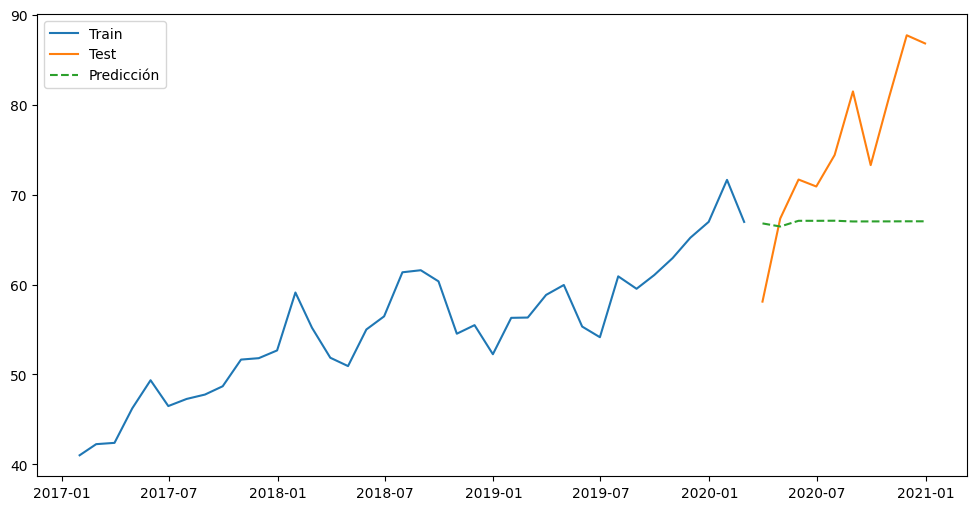

In [49]:
# Visualizamos
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.plot(forecast, label="Predicción", linestyle="--")
plt.legend()
plt.show()

### Reflexiones
- ¿Cómo mantenemos este modelo mes a més, con nuevos datos?
- ¿Qué ocurre si cambiamos de modelo ARIMA(1,0,0) o ARIMA(5,1,2)?
- ¿Qué ocurre si reducimos el threshold de entreno?
- ¿Qué ocurre si el periodo de la serie no es mensual?
- ...

## Predicción con un algoritmo supervisado

Vamos a complicar un poco más el estudio. Ahora el objetivo de nuestro analisis será predecir el valor del cierre de MSFT en función del valor del cierre de IBM y GOOGLE y el uso de dos indices Dow Jones y S&P500

Disponemos los datos en dos ficheros:
- "data/Stickers.csv" contiene los valores de las compañias
- "data/stock_data.csv" , los valores según los dos índices

Es importante que comprendáis el formato del fichero antes de intentar abrirlo con pandas.

In [ ]:
data = pd.read_csv(
    "data/Stickers.csv",
    header=[0, 1],      # dos filas de encabezado!!
    index_col=0,        # la primera columna es Date
    parse_dates=True    # convierte automáticamente la columna Date en datetime
)

print(data.head())

            Adj Close                             Close              \
                GOOGL         IBM       MSFT      GOOGL         IBM   
Date                                                                  
2017-01-03  40.400501  115.346306  57.138737  40.400501  159.837479   
2017-01-04  40.388500  116.774376  56.883072  40.388500  161.816437   
2017-01-05  40.651001  116.388054  56.883072  40.651001  161.281067   
2017-01-06  41.260502  116.960693  57.376114  41.260502  162.074570   
2017-01-09  41.359001  115.663658  57.193520  41.359001  160.277252   

                            High                               Low  \
                 MSFT      GOOGL         IBM       MSFT      GOOGL   
Date                                                                 
2017-01-03  62.580002  40.571999  160.487579  62.840000  39.844501   
2017-01-04  62.299999  40.671501  162.399612  62.750000  40.205502   
2017-01-05  62.299999  40.687000  161.940720  62.660000  40.296001   
2017-01-06 

In [59]:
stock_data = pd.read_csv(
    "data/stock_data.csv",
    header=[0, 1],      # dos filas de encabezado!!
    index_col=0,        # la primera columna es Date
    parse_dates=True    # convierte automáticamente la columna Date en datetime
)

print(stock_data.head())

               Adj Close                      Close               \
                    ^DJI        ^GSPC          ^DJI        ^GSPC   
Date                                                               
2017-01-03  19881.759766  2257.830078  19881.759766  2257.830078   
2017-01-04  19942.160156  2270.750000  19942.160156  2270.750000   
2017-01-05  19899.289062  2269.000000  19899.289062  2269.000000   
2017-01-06  19963.800781  2276.979980  19963.800781  2276.979980   
2017-01-09  19887.380859  2268.899902  19887.380859  2268.899902   

                    High                        Low               \
                    ^DJI        ^GSPC          ^DJI        ^GSPC   
Date                                                               
2017-01-03  19938.529297  2263.879883  19775.929688  2245.129883   
2017-01-04  19956.140625  2272.820068  19878.830078  2261.600098   
2017-01-05  19948.599609  2271.500000  19811.119141  2260.449951   
2017-01-06  19999.630859  2282.100098  19834.08

In [ ]:
### IMPORTANTE! Tenemos dos ficheros, necesitamos unirlos para tener un único dataset. Usamos el indice como elemento en común entre ambos
dataset = data.merge(stock_data, how="inner",left_index=True,right_index=True)
print(dataset[:5])

            Adj Close                             Close              \
                GOOGL         IBM       MSFT      GOOGL         IBM   
Date                                                                  
2017-01-03  40.400501  115.346306  57.138737  40.400501  159.837479   
2017-01-04  40.388500  116.774376  56.883072  40.388500  161.816437   
2017-01-05  40.651001  116.388054  56.883072  40.651001  161.281067   
2017-01-06  41.260502  116.960693  57.376114  41.260502  162.074570   
2017-01-09  41.359001  115.663658  57.193520  41.359001  160.277252   

                            High                               Low  ...  \
                 MSFT      GOOGL         IBM       MSFT      GOOGL  ...   
Date                                                                ...   
2017-01-03  62.580002  40.571999  160.487579  62.840000  39.844501  ...   
2017-01-04  62.299999  40.671501  162.399612  62.750000  40.205502  ...   
2017-01-05  62.299999  40.687000  161.940720  62.660000 

### Gestión del tiempo.

Para gestionar el tiempo, necesitamos transformar la serie en algo más "masticable" para el modelo. 

En este caso, podemos reconvertir la serie en una frecuencia de 5 días laborales.

In [61]:
# Reconvertimos la frecuencia agrupando los valores. La semana empieza en el lunes !
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html
data5days = dataset.resample("1W-MON").mean(numeric_only=True)  
data5days.head()


Adj Close                             Close              \
                GOOGL         IBM       MSFT      GOOGL         IBM   
Date                                                                  
2017-01-09  40.811901  116.226617  57.094903  40.811901  161.057361   
2017-01-16  41.454250  115.311779  57.321336  41.454250  159.789677   
2017-01-23  41.534500  116.330086  57.162468  41.534500  161.200766   
2017-01-30  42.338200  122.245384  58.869874  42.338200  169.397702   
2017-02-06  40.954400  120.744125  58.201519  40.954400  167.317398   

                            High                               Low  ...  \
                 MSFT      GOOGL         IBM       MSFT      GOOGL  ...   
Date                                                                ...   
2017-01-09  62.532000  40.980000  161.921606  62.896001  40.400401  ...   
2017-01-16  62.780000  41.554250  160.693115  63.142500  41.189251  ...   
2017-01-23  62.606000  41.677701  161.780115  62.864000  41.245400  ...   
2017-01-30  64.475999  42.755399  170.248566  64.816001  42.054700  ...   
2017-02-06  63.744000  41.201500  167.986615  64.106001  40.713400  ...   

                   Close                       High               \
                    ^DJI        ^GSPC          ^DJI        ^GSPC   
Date                                                               
2017-01-09  19914.878125  2268.691992  19957.335938  2273.158008   
2017-01-16  19896.634766  2272.324951  19952.964355  2276.262512   
2017-01-23  19798.198047  2267.995947  19842.650000  2273.432031   
2017-01-30  20029.408203  2290.141992  20060.282031  2294.039990   
2017-02-06  19952.764062  2285.850049  19997.016016  2289.337988   

                     Low                       Open                    Volume  \
                    ^DJI        ^GSPC          ^DJI        ^GSPC         ^DJI   
Date                                                                            
2017-01-09  19837.467969  2260.027979  19905.346094  2265.216016  290864000.0   
2017-01-16  19822.260254  2262.965027  19900.620117  2270.549988  301407500.0   
2017-01-23  19736.757812  2261.320020  19814.990234  2269.583936  337072000.0   
2017-01-30  19958.350391  2281.860010  19999.477734  2288.083936  352768000.0   
2017-02-06  19885.774219  2277.549951  19937.026172  2283.824023  354716000.0   

                          
                   ^GSPC  
Date                      
2017-01-09  3.577758e+09  
2017-01-16  3.455635e+09  
2017-01-23  3.353020e+09  
2017-01-30  3.602052e+09  
2017-02-06  3.707408e+09  

[5 rows x 30 columns]

In [62]:
# ¿Usaremos todas las features? 
for ix,col in enumerate(data5days.columns):
    print(ix,col)
    

0 ('Adj Close', 'GOOGL')
1 ('Adj Close', 'IBM')
2 ('Adj Close', 'MSFT')
3 ('Close', 'GOOGL')
4 ('Close', 'IBM')
5 ('Close', 'MSFT')
6 ('High', 'GOOGL')
7 ('High', 'IBM')
8 ('High', 'MSFT')
9 ('Low', 'GOOGL')
10 ('Low', 'IBM')
11 ('Low', 'MSFT')
12 ('Open', 'GOOGL')
13 ('Open', 'IBM')
14 ('Open', 'MSFT')
15 ('Volume', 'GOOGL')
16 ('Volume', 'IBM')
17 ('Volume', 'MSFT')
18 ('Adj Close', '^DJI')
19 ('Adj Close', '^GSPC')
20 ('Close', '^DJI')
21 ('Close', '^GSPC')
22 ('High', '^DJI')
23 ('High', '^GSPC')
24 ('Low', '^DJI')
25 ('Low', '^GSPC')
26 ('Open', '^DJI')
27 ('Open', '^GSPC')
28 ('Volume', '^DJI')
29 ('Volume', '^GSPC')


In [63]:
# Vamos a utilizar: el valor de cierre y el volumen de las acciones de cada compañia; más los dos indices de cierre.
# Limpiamos series innecesarias
columns_a_conservar= [3,4,5,15,16,17,20,21]
columns_a_eliminar = set(range(len(data5days.columns)))-set(columns_a_conservar)
columns_a_eliminar = list(columns_a_eliminar)
columns_a_eliminar

[0,
 1,
 2,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 18,
 19,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [64]:
data5days_clean = data5days.drop(data5days.columns[columns_a_eliminar],axis=1)
data5days_clean.head()

Close                             Volume             \
                GOOGL         IBM       MSFT       GOOGL        IBM   
Date                                                                  
2017-01-09  40.811901  161.057361  62.532000  32963200.0  3165907.2   
2017-01-16  41.454250  159.789677  62.780000  25812500.0  3535767.5   
2017-01-23  41.534500  161.200766  62.606000  29210800.0  6789606.8   
2017-01-30  42.338200  169.397702  64.475999  56426000.0  4919526.2   
2017-02-06  40.954400  167.317398  63.744000  35357600.0  3245800.8   

                               Close               
                  MSFT          ^DJI        ^GSPC  
Date                                               
2017-01-09  21443140.0  19914.878125  2268.691992  
2017-01-16  20125200.0  19896.634766  2272.324951  
2017-01-23  22419380.0  19798.198047  2267.995947  
2017-01-30  33673920.0  20029.408203  2290.141992  
2017-02-06  32173440.0  19952.764062  2285.850049

In [65]:
# En cualquier momento, podemos simplicar el uso de multiindex eliminando un nivel superior 
data5days_clean.columns = data5days_clean.columns.droplevel(0)
data5days_clean.columns

Index(['GOOGL', 'IBM', 'MSFT', 'GOOGL', 'IBM', 'MSFT', '^DJI', '^GSPC'], dtype='object')

In [66]:
# Y renombramos columnas: MUY IMPORTANTE EL ORDEN!!
columns_names = ["CloseGOOGL","CloseIBM","CloseMSFT","VolGOOGL","VolIBM","VolMSFT","DJI","SP500"]
data5days_clean.columns = columns_names

data5days_clean.head()


,CloseGOOGL,CloseIBM,CloseMSFT,VolGOOGL,VolIBM,VolMSFT,DJI,SP500
Date,,,,,,,,
2017-01-09,40.811901,161.057361,62.532000,32963200.0,3165907.2,21443140.0,19914.878125,2268.691992
2017-01-16,41.454250,159.789677,62.780000,25812500.0,3535767.5,20125200.0,19896.634766,2272.324951
2017-01-23,41.534500,161.200766,62.606000,29210800.0,6789606.8,22419380.0,19798.198047,2267.995947
2017-01-30,42.338200,169.397702,64.475999,56426000.0,4919526.2,33673920.0,20029.408203,2290.141992
2017-02-06,40.954400,167.317398,63.744000,35357600.0,3245800.8,32173440.0,19952.764062,2285.850049


Con los datos preparados, podemos analizar los valores de estas series y sus posibles relaciones

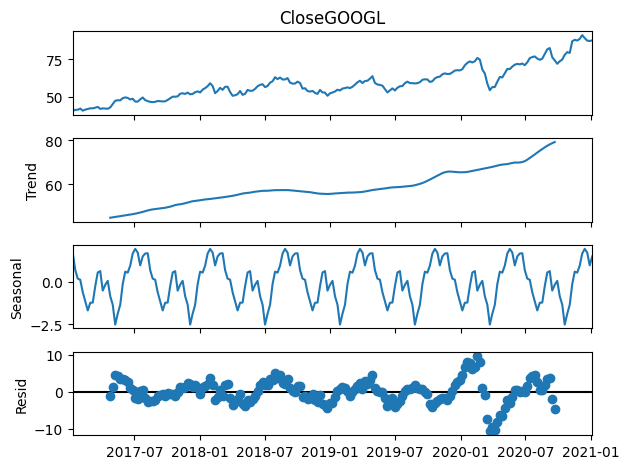

In [71]:
# Su desomposición
result = seasonal_decompose(data5days_clean.CloseGOOGL, model="additive", period=30)
fig = result.plot()
plt.show()

o incluso podemos mirar la matriz de correlación para detectar algún patrón común entre los datos

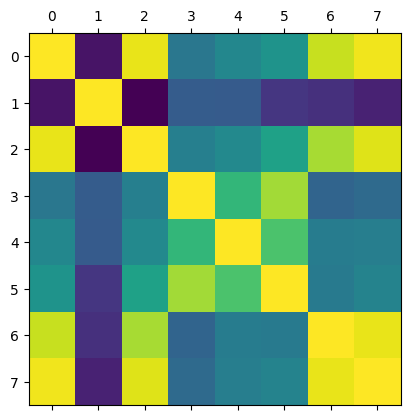

In [72]:
#con matplotlib 
import matplotlib.pyplot as plt
correlation = data5days_clean.corr()
plt.matshow(correlation)

<Axes: >

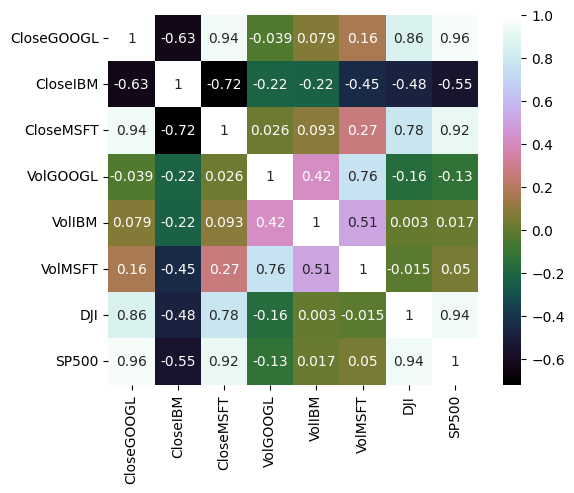

In [73]:
#con seaborn 
import seaborn as sns
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

Con los datos ya preparados aplicamos un modelo supervisados de predicción. PERO esta vez, aplicamos *multiples modelos**.
Nuestra variable objetivo, por ejemplo, será el valor de cierre de Google.


In [74]:
# Aplicación de modelos de supervisado

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

# Vamos aplicar diferentes modelos
models = [LinearRegression,SVR,RandomForestRegressor]

# Preparamos las variables: features y target
X = data5days_clean.drop(labels=["CloseGOOGL"],axis=1)
Y = data5days_clean.CloseGOOGL

# Particionamos los datos de entreno y test al 80%
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=33)


In [75]:
# Variables de salida
model_names = []
train_results = []
test_results = []

# Entrenamos y testeamos
for model in models:
    print("Model: %s"%model.__name__)
    model_names.append(model.__name__)
    res = model().fit(X=X_train,y=y_train)
    train_result = mean_squared_error(res.predict(X_train), y_train) 
    train_results.append(train_result)

    test_result = mean_squared_error(res.predict(X_test), y_test)
    test_results.append(test_result)


Model: LinearRegression
Model: SVR
Model: RandomForestRegressor


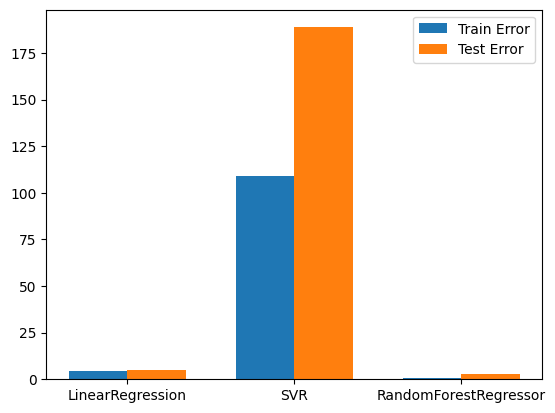

In [76]:
import numpy as np
ind = np.arange(len(models)) 
width = 0.35 # the width of the bars

fig,ax = plt.subplots()
plt.bar(ind - width/2, train_results, width=width, label='Train Error')
plt.bar(ind + width/2, test_results, width=width, label='Test Error')
plt.legend()
ax.set_xticks(ind)
ax.set_xticklabels(model_names)
plt.show()

## Más allá de la regresión lineal simple

En la sesión de hoy seguiremos trabajando con las técnicas de regresión, profundizaremos
en las técnicas de regresión lineal y veremos otras técnicas de regresión no lineal.
Por otra parte revisaremos las métricas más usadas para este problema. Finalmente
trabajaremos en la automatización de los procesos de aprendizaje automático.

1. Uso de la regularización
2. Regresión no lineal: un ejemplo
3. Métricas de regresión
4. Buenas prácticas I: Conjuntos de entrenamiento y test.


### 1. Uso de la regularización

Una forma de encontrar una buena relación entre el sesgo y la varianza es ajustar la complejidad del modelo a través de
**la regularización**. La regularización es un método muy útil para manejar
colinealidad (alta correlación entre características), filtrar el ruido de los datos y
eventualmente evitará el _overfitting_. El concepto detrás de la regularización es introducir
información adicional (sesgo) para penalizar los valores extremas de los parámetros.

Si tenemos que la expresión para una regresión lineal es: $$y = w_0x_0+w_1x_1+...+w_nx_n=\sum^m_{i=0} w_i X_{i}$$

Y la función que queremos minimizar es: $$J(w) = \sum^n_{i=1}(y^{(i)}-\hat{y}^{(i)})^2 $$


### Ridge Regression
La _Ridge Regression_ es un modelo que usa una penalización aplicando la norma L2 donde simplemente agregamos
la suma al cuadrado de los pesos de nuestra función de coste:

$$ J(w)_{Ridge} = \sum^n_{i=1}(y^{(i)}-\hat{y}^{(i)})^2 + \lambda\| w \|_2$$

El uso de esta regresión sería el siguiente:

In [110]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)

Al aumentar el valor del hiperparámetro $\lambda$, aumentamos la fuerza de la regularización
y encogemos los pesos de nuestro modelo. Hay que tener en cuenta que no regularizamos
el término del _intercepto_ ($w_0$).

### Lasso Regression (L1)
Un enfoque alternativo que puede conducir a modelos dispersos es la regresión LASSO.
Según sea el valor del término de regularización, ciertos pesos pueden coger el valor cero,
lo que hace que este tipo de regresión LASSO también sea útil como técnica de selección de características
supervisada.

La función a minimizar en este caso es:
$$ J(w)_{Lasso} = \sum^n_{i=1}(y^{(i)}-\hat{y}^{(i)})^2 + \lambda\| w \|_1$$

El uso de esta regresión sería el siguiente:

In [111]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

### Elastic Net Regression

Sin embargo, una limitación de LASSO es que selecciona como máximo $n$ variables si $ m > n $.
_Elastic Net_ ofrece un buen compromiso entre la _Ridge_ _regression_  y LASSO, que tiene una
Penalización L1 para generar una selección de características y penalización L2 para superar algunas de las limitaciones de la regresión LASSO, como es el número de variables seleccionadas.

La función a minimizar en este caso es:

$$ J(w)_{Elasticnet} = \sum^n_{i=1}(y^{(i)}-\hat{y}^{(i)})^2 + \lambda_1 \sum^n_{i=1} w^2_j + \lambda_2 \sum^n_{i=1} w_j $$

El uso de esta regresión sería el siguiente:

In [112]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=1.0, l1_ratio=0.5)

### Regresión polinómica
La regresión polinomial es un caso especial de regresión lineal en el que se construyen nuevas características en
función del grado del polinomio que se quiera construir.
En las secciones anteriores, hemos asumido una relación lineal entre las variables del modelo y
la variable objetivo. Una forma de no tener en cuenta el supuesto de linealidad es
usar un modelo de regresión polinomial, es decir agregando términos polinomiales.

$$ y = w_0 + w_1x + w_2x^2 + ... + w_dx^d $$

donde $d$ es el grado del polinomio. Aunque podemos usar un polinomio
para modelar una relación no lineal, todavía se considera una
modelo de regresión lineal debido a los coeficientes $w$.


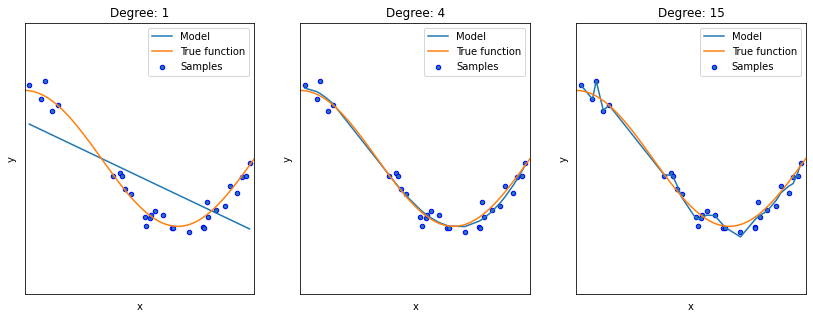

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)
n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    
    linear_regression = LinearRegression()
    polynomial_features = PolynomialFeatures(degree=degrees[i])
    polynomial = polynomial_features.fit_transform(X[:, np.newaxis])
    
    linear_regression.fit(polynomial, y)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X, linear_regression.predict(polynomial), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")

    plt.title( "Degree: " + str(degrees[i]))
    
plt.show()

### Regresión no lineal: un ejemplo

Cuando queremos resolver un problema usando un modelo más complejo podemos elegir alguno de los siguientes:

- Árboles de regresión
- Bosques de regresión
- SVM para la regresión
- Y todos los modelos que existen...

Realizaremos un ejercicio con los árboles de decisión debido a que son fáciles de entender y que en sesiones futuras
trabajaremos con los análogos de los Bosques de regresión y las SVM para problemas de clasificación.

Los **árboles de decisión (DT)** son un método de aprendizaje supervisado no paramétrico que se utiliza para
clasificación y regresión. El objetivo es crear un modelo que prediga el valor de una variable objetivo mediante
el aprendizaje de reglas de decisión simples inferidas de las características de los datos. Un árbol puede verse como
una aproximación de una función a trozos.

En sci-kit la clase que modela este tipo de árboles se llama `DecisionTreeRegressor` [enlace](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html)

Veamos un ejemplo sencillo:

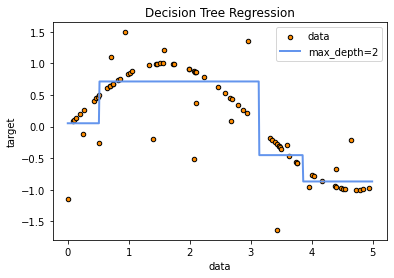

In [114]:
# Importamos las librerias necesarias
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Generamos un conjunto de datos (función seno)
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Entrenamos el modelo

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_1.fit(X, y)

# Realizamos una predicción
X_test = np.expand_dims(np.arange(0.0, 5.0, 0.01), 1)
y_1 = regr_1.predict(X_test)

# Mostramos los resultados
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

Vamos a ver la estructura del primer árbol que hemos entrenado para entender mejor el proceso que ha seguido:

[Text(0.5, 0.8333333333333334, 'X[0] <= 3.133\nsquared_error = 0.547\nsamples = 80\nvalue = 0.122'),
 Text(0.25, 0.5, 'X[0] <= 0.514\nsquared_error = 0.231\nsamples = 51\nvalue = 0.571'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.192\nsamples = 11\nvalue = 0.052'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.148\nsamples = 40\nvalue = 0.714'),
 Text(0.75, 0.5, 'X[0] <= 3.85\nsquared_error = 0.124\nsamples = 29\nvalue = -0.667'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.124\nsamples = 14\nvalue = -0.452'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.041\nsamples = 15\nvalue = -0.869')]

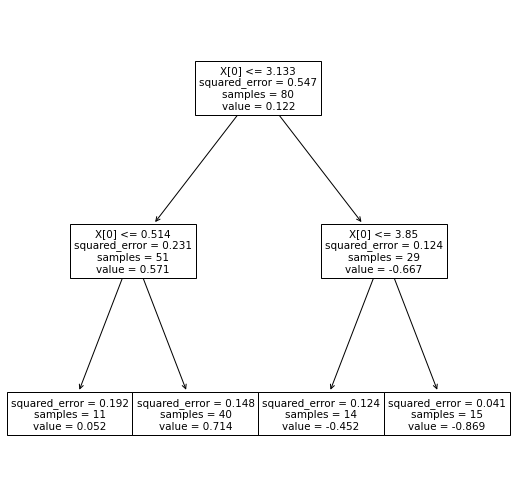

In [115]:
from sklearn import tree
plt.figure(figsize=(9,9))
tree.plot_tree(regr_1)

**Ejercicio**

- Cambia el parámetro _max_depth_ del modelo. Que pasa si es 1? Que pasa si es 5 o mayor?
- Visualiza el árbol resultante. 
- Cuál es la medida de Score de este método (mirar documentación)? Como cambia al permitir árboles más profundos?
- Busca en la documentación de Sci-kit de los Bosques de Regresión ( _RandomForestRegressor_ ) compara el score obtenido cuando incrementamos el número de árboles, manteniendo la misma profundidad.

## Métricas para problemas de regression

Las métricas más comunes en los problemas de regresión son el **error cuadrático** y el **error absoluto**, y sus distintas modificaciones.

### 3.1 Errores cuadráticos

El **error cuadrático (Squared Error)** de un valor predicho con respecto al valor real, se calcula cómo:

$$ SE = \sum_j\left[\hat{y}_j - y_j\right]^2$$


**Error cuadrático medio (Mean Squared Error)** Da una idea del error de nuestras predicciones dando más peso a los errores grandes.

$$ MSE = \frac{1}{m}\sum_j^m \left[\hat{y}_j - y_j\right]^2 $$

**Raiz del error cuadrático medio (Root Mean Square Error)** La raíz cuadrada del MSE produce el error de la raíz cuadrada de la media o la desviación de la raíz cuadrada media (RMSE o RMSD). Tiene las mismas unidades que la cantidad que estima. Para un estimador sin sesgo (bies), el RMSE es la raíz cuadrada de la varianza, es decir la desviación estandar.

$$ RMSE = \sqrt{\frac{1}{m}\sum_j^m \left[\hat{y}_j - y_j\right]^2} $$



A pesar de ser una de las métricas más utilizadas, tiene el inconveniente de ser sensible a los valores extremos (outliers). Cuando este comportamiento pueda suponer un problema, los **errores absolutos** pueden darnos una mejor medida de rendimiento.

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
sns.set_context('notebook')
sns.set(rc={'figure.figsize':(12, 8)})

In [34]:
## Escribe una función que devuelva el MSE y el RMSE dados dos arrays de numpy

def MSE(x1, x2):
    """
    Returns the Root Mean Squared Error of the two input vectors
    """
    sq_error = ##
    mean_sq_error = np.##
    return mean_sq_error

def RMSE(x1, x2):
    """
    Returns the Root Mean Squared Error of two vectors. Depends on the MSE function
    """
    mse = MSE(x1, x2)
    root_mse = np.##
    return root_mse

SyntaxError: invalid syntax (820556737.py, line 7)

### 3.2 Errores absolutos

El **error absoluto** (Absolute Error) se define cómo:

$$ AE = \sum_j \left|\hat{y}_j - y_j\right| $$

#### Error absoluto medio (Mean Absolute Error)

Es más robusto a los valores extremos y su interpretabilidad es más alta que la del RMSE ya que también está en las unidades de la variable a predecir con la ventaja de que el dato no ha sufrido ninguna transformación.

$$ MAE = \frac{1}{m} \sum_j^m \left|\hat{y}_j - y_j\right| $$

#### Error absoluto medio porcentual (Mean Average Percentage Error)

A pesar de su simpleza, presenta varios inconvenientes a la hora de usarlo de forma práctica. Por ejemplo, **no puede usarse cuando el valor de referencia es 0**. Además, **si se usa para elegir métodos predictivos seleccionará de forma sistemática un metodo que prediga valores bajos.**
[wiki](https://en.wikipedia.org/wiki/Mean_absolute_percentage_error)

$$ MAPE = \frac{1}{m} \sum_j^m \left|\frac{\hat{y}_j - y_j}{y_j}\right| $$

### 3.3 Generalización

Las dos **métricas** expuestas anteriormente pueden considerarse como **distancias entre el vector de valores reales y el predicho**. De hecho, el RMSE corresponde a la **distancia euclidiana**, también conocida como norma $l_2$ o $\lVert{v}\rVert_2$.

Por otro lado, el MAE corresponde a la norma $l_1$ o $\lVert{v}\rVert_1$. A esta distancia se la conoce como **distancia de manhattan**, porque sólo se puede viajar de un bloque a otro de la ciudad a traves de calles ortogonales.

De forma general, una norma $l_k$ o $\lVert{v}\rVert_k$ se calcula:

$$\lVert{v}\rVert_k = \left(|v_0|^k + ...+ |v_m|^k \right)^\frac{1}{k}$$

El concepto de distancia será particularmente útil en los problemas de segmentación (aprendizaje no supervisado)


### 3.4 Coeficiente de determinación ($R^2$)

El coeficiente determina la calidad del modelo para replicar los resultados, y la proporción de variación de los resultados que puede explicarse por el modelo. El valor más alto obtenible será 1, aunque hay casos en los que puede presentar valores negativos. De forma intuitiva, $R^2$ compara el "fit" de nuestro modelo al de una linea recta horizontal. Dada una regresión lineal simple, un $R^2$ negativo sólo es posible cuando la ordenada en el origen o la pendiente están restringidas de forma que el mejor modelo es peor que una linea horizontal.

Si representamos la **varianza de la variable dependiente** por $\sigma^{2}$ y la **varianza residual** por $\sigma _{r}^{2}$, el coeficiente de determinación viene dado por la siguiente ecuación:

$$ R^{2}=1- \frac{\sigma_{r}^{2}}{\sigma ^{2}}$$


Siendo $\hat{y}_i$ el valor predicho de la muestra i y $y_i$ el valor real, el $R^2$ estimado sobre $n_{\text{muestras}}$ se define como:

$$ R^2(y, \hat{y}) = 1 - \frac{\sum_{i=0}^{n_{\text{samples}} - 1} (y_i - \hat{y}_i)^2}{\sum_{i=0}^{n_\text{samples} - 1} (y_i - \bar{y})^2}$$
donde $$ \bar{y} =  \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}} - 1} y_i$$

#### 3.4.1 Consideraciones R²

1. R² no puede determinar si los coeficientes y las predicciones tienen bies: Hay que checkear los residos --> Si observamos patrones en los plots de residuos es indicativo de un mal ajuste a pesar de un R2 elevado

1. Cada vez que añadimos un predictor a un modelo, el R² aumenta aunque sea por suerte, pero nunca decrece. Por consiguiente, un modelo con muchos terminos puede parecer mejor simplemente por el hecho de tener más terminos. Para prevenir este efecto, podemos usar el **adjusted R²**, una versión modificada que se ajusta al número de predictores en el modelo. De ésta forma, el R² solo aumenta si el nuevo término mejora el modelo más que por mera suerte. Siempre es más bajo que el R²

$$\bar{R}^2 = 1 - \frac{N-1}{N-k-1}(1-R^2)$$


n – numero de observaciones

k – numero de parametros

[![License: CC BY 4.0](https://img.shields.io/badge/License-CC_BY_4.0-lightgrey.svg)](https://creativecommons.org/licenses/by/4.0/) <br/>
Isaac Lera and Gabriel Moya <br/>
Universitat de les Illes Balears <br/>
isaac.lera@uib.edu, gabriel.moya@uib.edu